In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

def interpret_output(A2):
    return np.argmax(A2, axis=0)[0]

def encode(y):
    encoded = np.zeros((1, 10))
    encoded[0, y] = 1
    return np.transpose(encoded)

def sigmoid(x, deriv=False):
    sig = 1/(1 + np.exp(-x))
    if(deriv):
        return sig*(1-sig)
    return sig


def init_params():
    W1 = np.random.uniform(-0.5, 0.5, (30, 784)).astype('float128')
    b1 = np.zeros((30,1)).astype('float128')
    W2 = np.random.uniform(-0.5, 0.5, (10, 30)).astype('float128')
    b2 = np.zeros((10,1)).astype('float128')
    return W1, b1, W2, b2

def forward_prop(W1, b1, W2, b2, A0):
    Z1=W1.dot(A0) + b1
    A1=sigmoid(Z1)
    Z2=W2.dot(A1) + b2
    A2=sigmoid(Z2)
    return A1, Z1, A2, Z2

def back_prop(A1, Z1, A2, Z2, A0, y):
    #cost function = 1/2 * sum((A2_i - Y_i)^2)
    dZ2 = (A2 - encode(y))*sigmoid(Z2, deriv=True)
    dW2 = dZ2.dot(np.transpose(A1))
    db2 = dZ2
    dZ1 = np.transpose(dW2).dot(dZ2) * sigmoid(Z1, deriv=True)
    dW1 = dZ1.dot(np.transpose(A0))
    db1 = dZ1
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha*dW1
    W2 = W2 - alpha*dW2
    b1 = b1 - alpha*db1
    b2 = b2 - alpha*db2
    return W1, b1, W2, b2

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data = np.array(data)


In [3]:
def train(data, epochs, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(epochs):
        for j in range(len(data)-1):
            A0 = data[j][1:785]
            A0.shape += (1,)
            y = data[j][0]
            A1, Z1, A2, Z2 = forward_prop(W1, b1, W2, b2, A0)
            dW1, db1, dW2, db2 = back_prop(A1, Z1, A2, Z2, A0, y)
            W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    return W1, b1, W2, b2

a, b, c, d = train(data[0:1000], 50, 0.1)

In [4]:
def test(data, W1, b1, W2, b2):
    results = 0
    for i in range(len(data)-1):
        A0 = data[i][1:785]
        A0.shape += (1,)
        y = data[i][0]
        A1, Z1, A2, Z2 = forward_prop(W1, b1, W2, b2, A0)
        res = interpret_output(A2) == y
        if(res):
            results = results + 1
    print('accuracy:' , results/len(data) * 100 , "%")
test(data[0:1000], a, b, c, d)

accuracy: 30.3 %


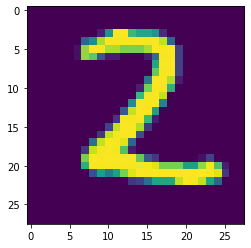

2
[[ 0.29408424  0.19586958  0.06635228 ...  0.01131454 -0.18419358
   0.14629176]
 [ 0.3525013  -0.20874951  0.4454082  ... -0.01104833  0.07177061
   0.36590366]
 [ 0.11343828  0.48099572  0.3112242  ...  0.05722818  0.26760646
   0.02831879]
 ...
 [-0.40840099  0.23103503 -0.38007546 ... -0.42236479  0.17528711
  -0.16941272]
 [-0.31151854 -0.39898136 -0.25782905 ... -0.24654154  0.49349296
   0.03876829]
 [-0.20288078 -0.11249857 -0.0708776  ...  0.05830508  0.49221807
   0.49005204]]


In [5]:
def test_prediction(W1, b1, W2, b2, A0, y):
    A1, Z1, A2, Z2 = forward_prop(W1, b1, W2, b2, A0)
    img = A0.reshape((28,28)) * 255
    plt.imshow(img, interpolation = "nearest")
    plt.show()
    res = interpret_output(A2)
    print(res)
    
i=101
test_prediction(a, b, c, d, data[i][1:785], data[i][0])
print(a)